In [1]:
# Toni Pikkarainen
# Deep-learning 
# Demo 2 - Task 2-1
# Fashion-MNIST 
# Play with training hyper-parameters (e.g. network architecture, learning
# rates, optimizers, etc.) and compare performance

# jokaiseen neuroniin liittyy inputien lukumäärästä riippuva lukumäärä painoja 
# plus yksi bias.



In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/fashion', one_hot=True)


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# fashion_mnist = tf.keras.datasets.fashion_mnist
#mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [10]:
BATCH_SIZE=10


# Create the model
x = tf.placeholder(tf.float32, [None, 784]) 
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax( tf.matmul(x, W) + b)

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y)) 
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

# training
for _ in range(1000):
    batch_xs, batch_ys = data.train.next_batch(BATCH_SIZE) 
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

    
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print('Accuracy:', sess.run(accuracy, feed_dict={x: data.test.images, y_: data.test.labels}))

predicted_values = (tf.nn.softmax(tf.matmul(data.test.images, W) + b)).eval(session=sess)

# own testing of predictions
index = 0
print("One prediction:")
print(np.argmax(predicted_values[index]))
print(data.test.labels[index])
#predicted_values[0]


sess.close()

/anaconda2/envs/py37/lib/python3.7/site-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Accuracy: 0.6187
One prediction:
9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [49]:
# Multi-Layer Perceptron (MLP)
# ----------------------------

def mlp_no_keras(parameter_list):
    print('Test shape:',data.test.images.shape)
    print('Train shape:',data.train.images.shape)
    # Parameters
    learning_rate = parameter_list[0]
    training_epochs = parameter_list[1]
    batch_size = parameter_list[2]
    display_step = parameter_list[3]
    
    # Network Parameters
    n_hidden_1 = parameter_list[4] # 1st layer number of features 
    n_hidden_2 = parameter_list[5] # 2nd layer number of features
    n_input = 784 # MNIST data input (img shape: 28*28) 
    n_classes = 10 # MNIST total classes (0-9 digits)
    
    
    x = tf.placeholder("float", [None, n_input])
    y = tf.placeholder("float", [None, n_classes])
    
    # Store layers weight & bias
    weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])), #784x256 
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])), #256x256 
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes])) #256x10
    }
    biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),  #256x1 
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),  #256x1
    'out': tf.Variable(tf.random_normal([n_classes]))   #10x1
    }
    return construct_model(x,y,weights,biases,training_epochs, learning_rate, batch_size, display_step)




In [45]:
# Create model
def multilayer_perceptron(x, weights, biases):
    # Use tf.matmul instead of "*" because tf.matmul can change it's dimensions on the fly (broadcast)
    print( 'x:', x.get_shape(), 'W1:', weights['h1'].get_shape(), 'b1:', biases['b1'].get_shape())
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) #(x*weights['h1']) + biases['b1']
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    print( 'layer_1:', layer_1.get_shape(), 'W2:', weights['h2'].get_shape(), 'b2:', biases['b2'].get_shape()) 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']) # (layer_1 * weights['h2']) + biases['b2'] 
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    print( 'layer_2:', layer_2.get_shape(), 'W3:', weights['out'].get_shape(), 'b3:', biases['out'].get_shape()) 
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out'] # (layer_2 * weights['out']) + biases['out'] 
    print('out_layer:',out_layer.get_shape())
    return out_layer




In [48]:
# OBS: This uses data as hidden input!!
def construct_model(x,y,weights,biases,training_epochs,learning_rate,batch_size,display_step):
    # Construct model
    pred = multilayer_perceptron(x, weights, biases)
    # Cross entropy loss function
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=pred))
    # On this case we choose the AdamOptimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    # Initializing the variables
    init = tf.global_variables_initializer()
    # Launch the graph
    accuracy_num = 0
    with tf.Session() as sess: 
        sess.run(init)
        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(data.train.num_examples/batch_size) # Loop over all batches
            for i in range(total_batch):
                batch_x, batch_y = data.train.next_batch(batch_size)
                # Run optimization op (backprop) and cost op (to get loss value)
                _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
                # Compute average loss
                avg_cost += c / total_batch
            # Display logs per epoch step
            if epoch % display_step == 0:
                print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
            print("Optimization Finished!")
            
        # Test model
        correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
        # Calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        # To keep sizes compatible with model
        accuracy_num =  accuracy.eval({x: data.test.images, y: data.test.labels})
        print ("Accuracy:", accuracy.eval({x: data.test.images, y: data.test.labels}))
        print("Test sample:")
        #Get 28x28 image
        test_sample = 70
        sample_1 = data.test.images[test_sample].reshape(28,28)
        # Get corresponding integer label from one-hot encoded data
        sample_label_1 = np.where(data.test.labels[test_sample] == 1)[0][0]
        # Plot sample
        plt.imshow(sample_1, cmap='Greys')
        plt.title('label = {}'.format(sample_label_1))
        plt.show()
        x_test = data.test.images[test_sample].reshape(1,784) 
        predicted_value = tf.argmax(pred, 1)
        #print()
        #print("is classified as: {}".format(predicted_value.eval(session=sess, feed_dict={x: x_test})))
        print("is classified as: {}".format(class_names[predicted_value.eval(session=sess, feed_dict={x: x_test})[0]]))
        return accuracy_num

Test shape: (10000, 784)
Train shape: (55000, 784)
x: (?, 784) W1: (784, 256) b1: (256,)
layer_1: (?, 256) W2: (256, 256) b2: (256,)
layer_2: (?, 256) W3: (256, 10) b3: (10,)
out_layer: (?, 10)
Epoch: 0001 cost= 147.145827734
Optimization Finished!
Epoch: 0002 cost= 60.092364495
Optimization Finished!
Epoch: 0003 cost= 42.614430991
Optimization Finished!
Epoch: 0004 cost= 33.487024370
Optimization Finished!
Epoch: 0005 cost= 27.308218115
Optimization Finished!
Accuracy: 0.8051
Test sample:


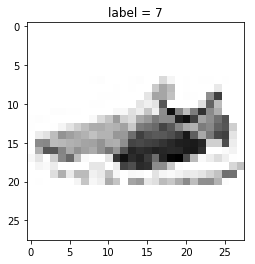

is classified as: Sneaker
Test shape: (10000, 784)
Train shape: (55000, 784)
x: (?, 784) W1: (784, 256) b1: (256,)
layer_1: (?, 256) W2: (256, 256) b2: (256,)
layer_2: (?, 256) W3: (256, 10) b3: (10,)
out_layer: (?, 10)
Epoch: 0001 cost= 165.449701122
Optimization Finished!
Epoch: 0002 cost= 64.836511719
Optimization Finished!
Epoch: 0003 cost= 46.239189188
Optimization Finished!
Epoch: 0004 cost= 37.012781363
Optimization Finished!
Epoch: 0005 cost= 30.112988762
Optimization Finished!
Epoch: 0006 cost= 23.731226840
Optimization Finished!
Epoch: 0007 cost= 21.091059968
Optimization Finished!
Epoch: 0008 cost= 17.820367102
Optimization Finished!
Epoch: 0009 cost= 15.410742656
Optimization Finished!
Epoch: 0010 cost= 13.571254794
Optimization Finished!
Accuracy: 0.8255
Test sample:


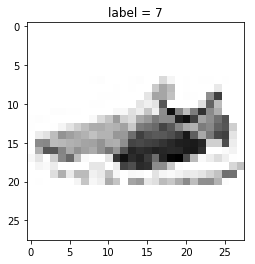

is classified as: Sneaker
Test shape: (10000, 784)
Train shape: (55000, 784)
x: (?, 784) W1: (784, 256) b1: (256,)
layer_1: (?, 256) W2: (256, 256) b2: (256,)
layer_2: (?, 256) W3: (256, 10) b3: (10,)
out_layer: (?, 10)
Epoch: 0001 cost= 153.535059267
Optimization Finished!
Epoch: 0002 cost= 54.212004332
Optimization Finished!
Epoch: 0003 cost= 37.676424441
Optimization Finished!
Epoch: 0004 cost= 30.525699696
Optimization Finished!
Epoch: 0005 cost= 23.768061888
Optimization Finished!
Epoch: 0006 cost= 20.406877413
Optimization Finished!
Epoch: 0007 cost= 17.117972286
Optimization Finished!
Epoch: 0008 cost= 14.746311000
Optimization Finished!
Epoch: 0009 cost= 12.843367632
Optimization Finished!
Epoch: 0010 cost= 11.096568229
Optimization Finished!
Epoch: 0011 cost= 9.514120227
Optimization Finished!
Epoch: 0012 cost= 8.576378773
Optimization Finished!
Epoch: 0013 cost= 7.709176913
Optimization Finished!
Epoch: 0014 cost= 6.821131215
Optimization Finished!
Epoch: 0015 cost= 5.9665171

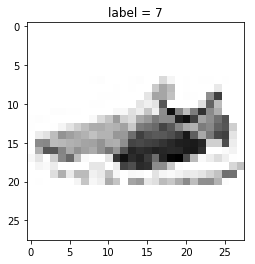

is classified as: Sneaker
Test shape: (10000, 784)
Train shape: (55000, 784)
x: (?, 784) W1: (784, 128) b1: (128,)
layer_1: (?, 128) W2: (128, 128) b2: (128,)
layer_2: (?, 128) W3: (128, 10) b3: (10,)
out_layer: (?, 10)
Epoch: 0001 cost= 113.217001561
Optimization Finished!
Epoch: 0002 cost= 29.377042635
Optimization Finished!
Epoch: 0003 cost= 20.169679834
Optimization Finished!
Epoch: 0004 cost= 14.992524061
Optimization Finished!
Epoch: 0005 cost= 11.871052107
Optimization Finished!
Epoch: 0006 cost= 9.929343850
Optimization Finished!
Epoch: 0007 cost= 7.965724468
Optimization Finished!
Epoch: 0008 cost= 6.730523835
Optimization Finished!
Epoch: 0009 cost= 5.749683027
Optimization Finished!
Epoch: 0010 cost= 4.813126851
Optimization Finished!
Epoch: 0011 cost= 4.099205822
Optimization Finished!
Epoch: 0012 cost= 3.615134147
Optimization Finished!
Epoch: 0013 cost= 3.043540760
Optimization Finished!
Epoch: 0014 cost= 2.692047099
Optimization Finished!
Epoch: 0015 cost= 2.323525339
Op

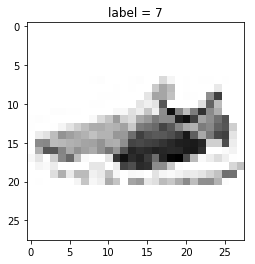

is classified as: Sandal
Test shape: (10000, 784)
Train shape: (55000, 784)
x: (?, 784) W1: (784, 256) b1: (256,)
layer_1: (?, 256) W2: (256, 256) b2: (256,)
layer_2: (?, 256) W3: (256, 10) b3: (10,)
out_layer: (?, 10)
Epoch: 0001 cost= 125.036377515
Optimization Finished!
Epoch: 0002 cost= 44.922563146
Optimization Finished!
Epoch: 0003 cost= 31.151191659
Optimization Finished!
Epoch: 0004 cost= 22.986063021
Optimization Finished!
Epoch: 0005 cost= 17.453296044
Optimization Finished!
Epoch: 0006 cost= 13.329944591
Optimization Finished!
Epoch: 0007 cost= 11.098182637
Optimization Finished!
Epoch: 0008 cost= 9.009110769
Optimization Finished!
Epoch: 0009 cost= 7.574295296
Optimization Finished!
Epoch: 0010 cost= 6.620340518
Optimization Finished!
Epoch: 0011 cost= 5.434561151
Optimization Finished!
Epoch: 0012 cost= 4.933718440
Optimization Finished!
Epoch: 0013 cost= 4.283542817
Optimization Finished!
Epoch: 0014 cost= 3.767370108
Optimization Finished!
Epoch: 0015 cost= 3.444974364
O

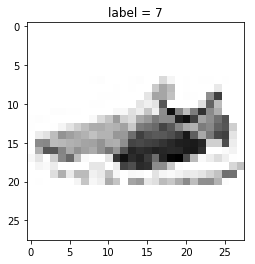

is classified as: Sneaker
Test shape: (10000, 784)
Train shape: (55000, 784)
x: (?, 784) W1: (784, 256) b1: (256,)
layer_1: (?, 256) W2: (256, 256) b2: (256,)
layer_2: (?, 256) W3: (256, 10) b3: (10,)
out_layer: (?, 10)
Epoch: 0001 cost= 201.777344222
Optimization Finished!
Epoch: 0002 cost= 72.840141088
Optimization Finished!
Epoch: 0003 cost= 53.848143498
Optimization Finished!
Epoch: 0004 cost= 42.739836842
Optimization Finished!
Epoch: 0005 cost= 36.403214947
Optimization Finished!
Epoch: 0006 cost= 30.481882196
Optimization Finished!
Epoch: 0007 cost= 26.581093212
Optimization Finished!
Epoch: 0008 cost= 23.375371135
Optimization Finished!
Epoch: 0009 cost= 21.252381127
Optimization Finished!
Epoch: 0010 cost= 19.077908793
Optimization Finished!
Epoch: 0011 cost= 16.880980426
Optimization Finished!
Epoch: 0012 cost= 15.242522082
Optimization Finished!
Epoch: 0013 cost= 14.014070813
Optimization Finished!
Epoch: 0014 cost= 12.552096577
Optimization Finished!
Epoch: 0015 cost= 11.27

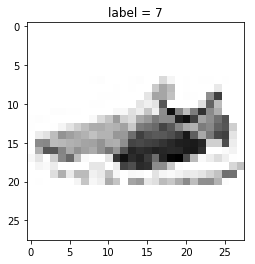

is classified as: Sneaker
   Learning rate  Training epochs  Batch size  Display step  n_hidden_1  \
0          0.001                5         100             1         256   
1          0.001               10         100             1         256   
2          0.001               20         100             1         256   
3          0.001               20         100             1         128   
4          0.001               20          50             1         256   

   n_hidden_2  accuracy  
0         256    0.8051  
1         256    0.8255  
2         256    0.8318  
3         128    0.8002  
4         256    0.8236  


In [57]:


# Initializing dataframe for results
result_list = []

testing_parameters = [[0.001, 5, 100, 1, 256, 256],
                     [0.001, 10, 100, 1, 256, 256],[0.001, 20, 100, 1, 256, 256],
                      [0.001, 20, 100, 1, 128, 128],[0.001, 20, 50, 1, 256, 256], [0.001, 20, 200, 1, 256, 256] ]

# Running the mlp_with_no_keras model
for x in testing_parameters:
    acc = mlp_no_keras(x)
    x.append(acc)
    result_list.append(x)
    

# Create the pandas DataFrame 
df = pd.DataFrame(result_list, columns = ['Learning rate', 'Training epochs', 'Batch size', 'Display step',
                                         'n_hidden_1', 'n_hidden_2','accuracy']) 
  
# print dataframe. 
print(df.head())
